## Project : EDA & Machine Learning with Diabetes Dataset ##

In [2]:
#importing all the necessary libraries to perform Data Preprocessing and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# reading the Dataset of Diabetes
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#to Check the Shape of Dataset
df.shape

(768, 9)

In [5]:
# to get all the information of all features with their dataset and total count of non-null values in them
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

we can see that there is no missing values in our dataset.

In [7]:
# to have Descriptive Statestics Result on each columns.
df.describe(include= 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#to get all the columns in dataset
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [9]:
# to convert all the feature name in lowercase.
df.columns = map(str.lower, df.columns)

In [10]:
# check first 5 records of dataset
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




*   **independent Features**: 'pregnancies', 'glucose', 'bloodpressure','skinthickness','insulin', 'bmi', 'diabetespedigreefunction', 'age'
*   **dependet/ Target Feature** : Outcome




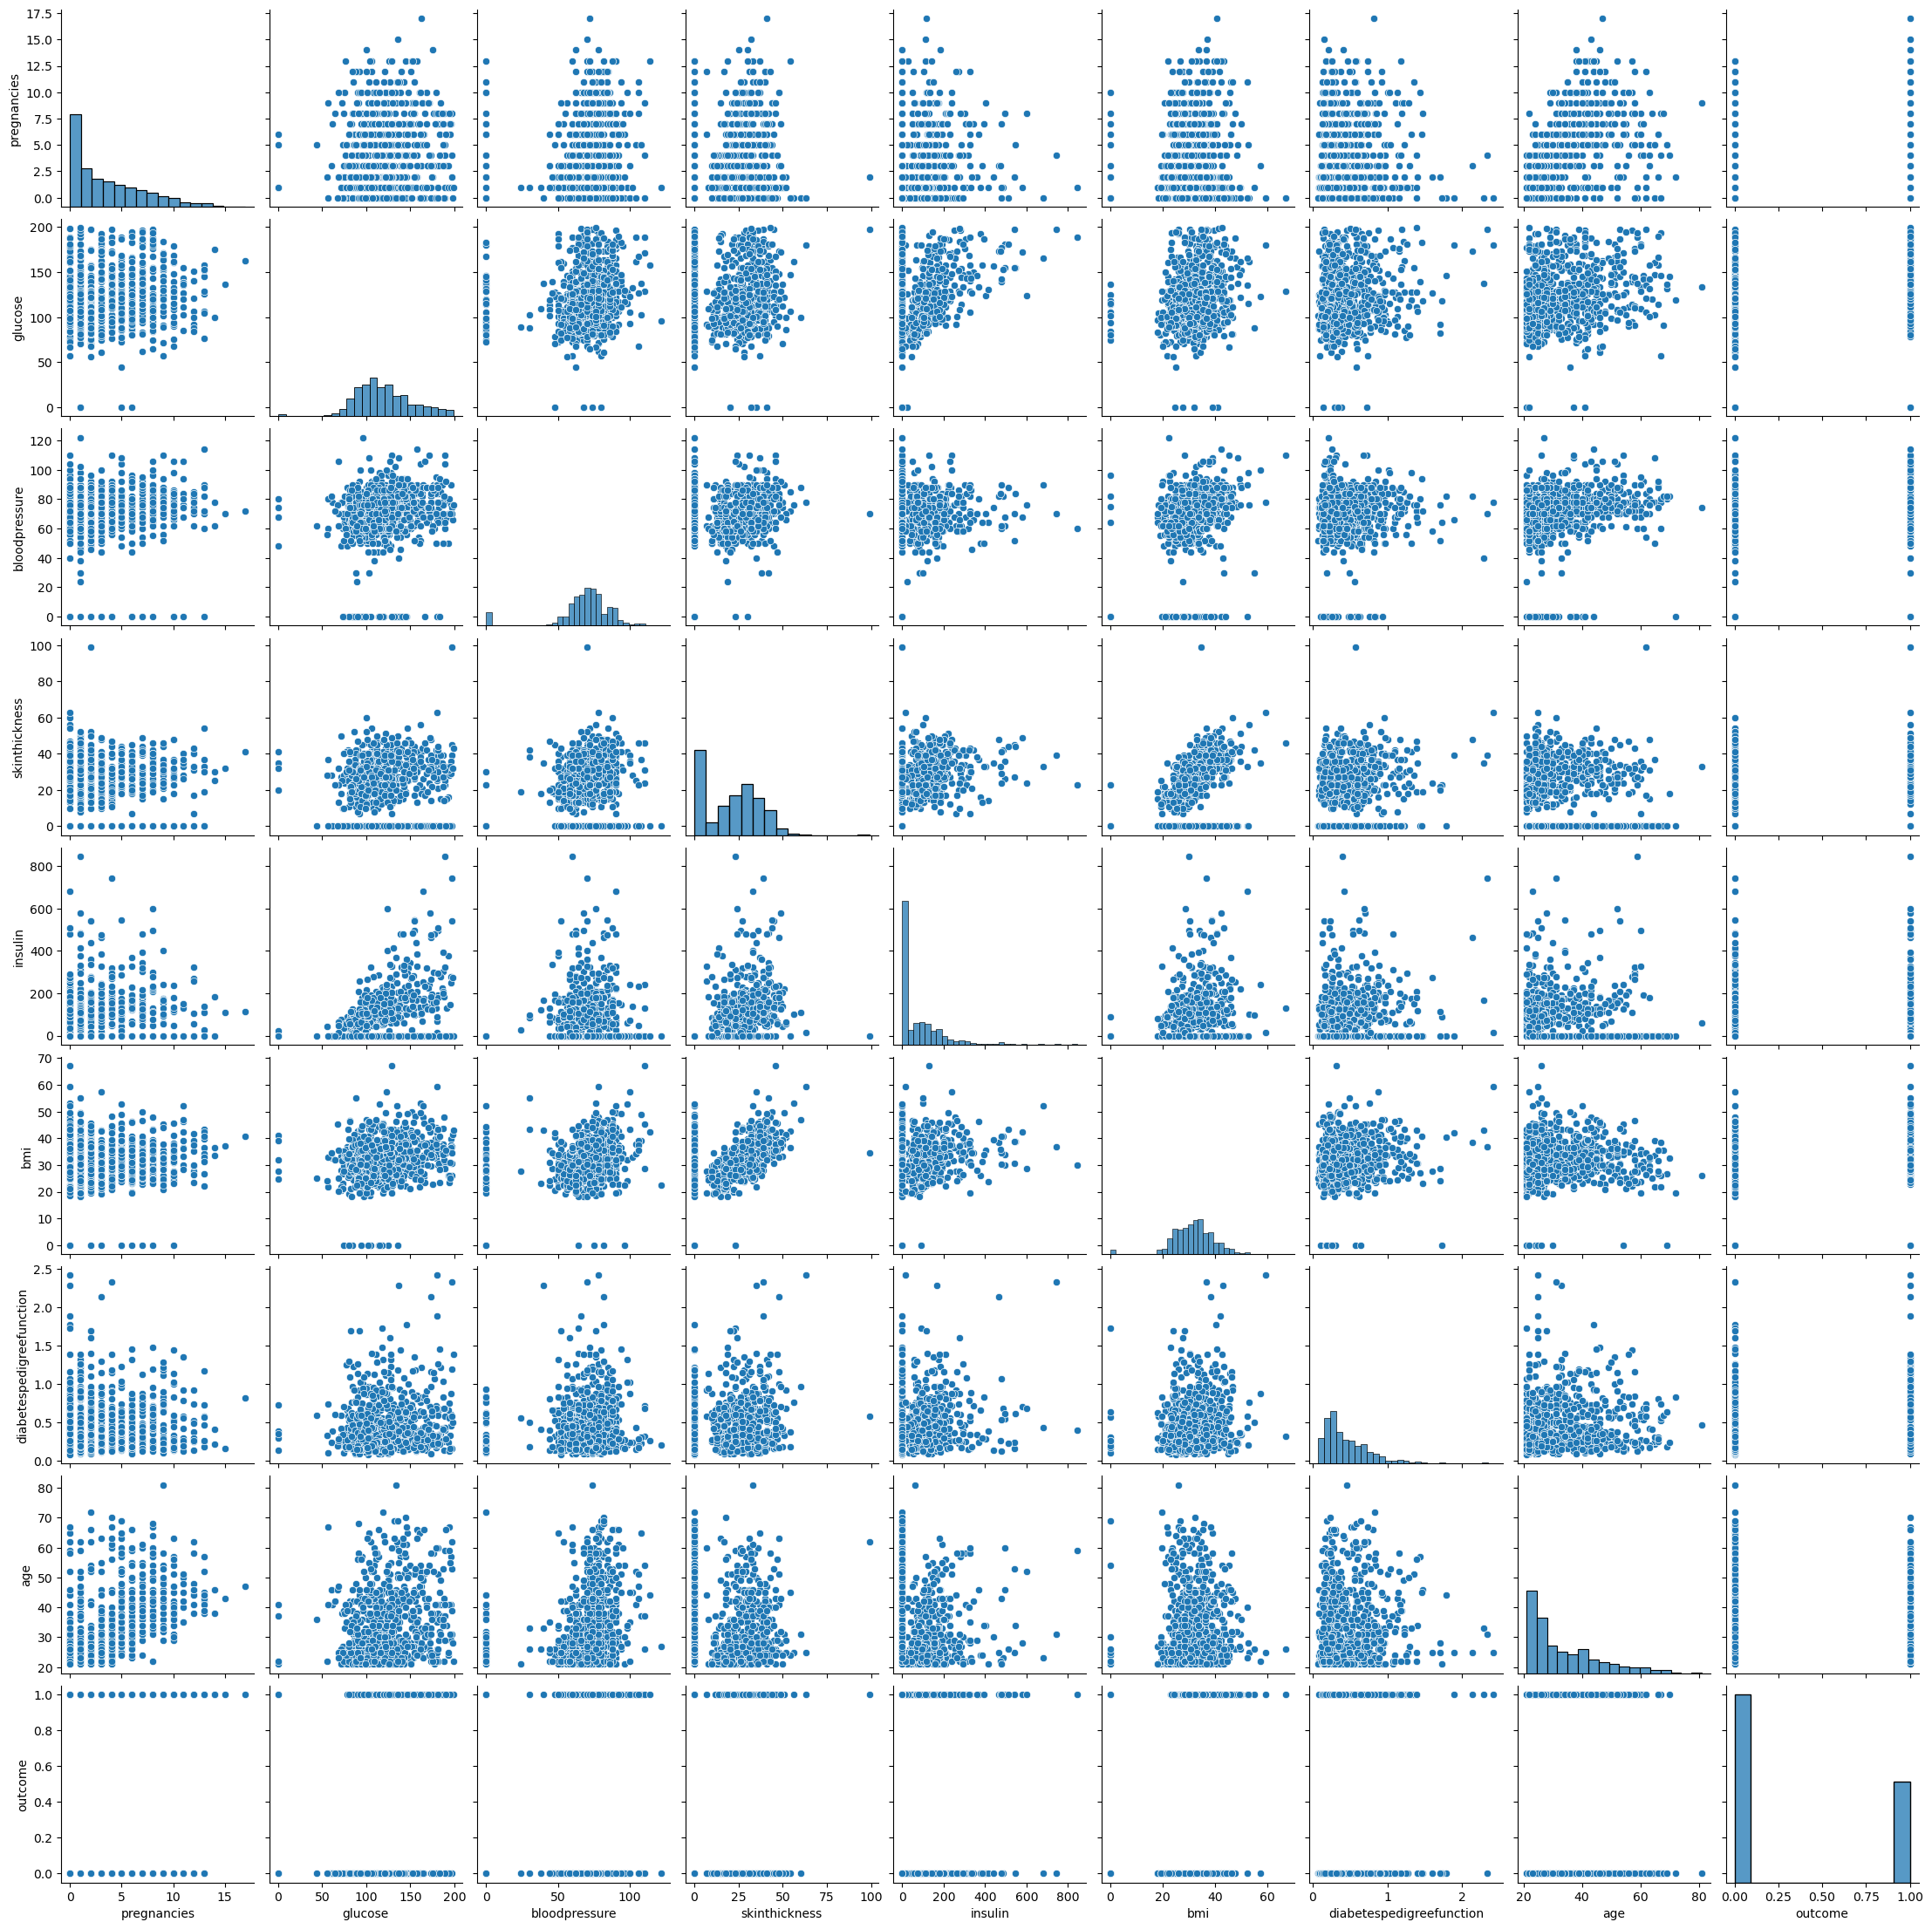

In [11]:
# perform bi-variate analysis each features with respec to other feature.
sns.pairplot(df)

We need to dig more to get more insights for each feature whether they are having normal distribution or not.

In [13]:
# lets check for target variable

df.outcome.value_counts()/len(df) * 100

0    65.104167
1    34.895833
Name: outcome, dtype: float64

We have Target feature called "Outcome" which indicates whether the Person is diabetic or not.

1.   1 represnets person is "Diabetic"
2.   0 represents person is " Not Diabetic"


Distribution of Data are as below :

*   **0 - Non-Diabetic - 65 %**
*   **1 - Diabetic- 35%**









In [14]:
for i in df.columns:
  print("skewness of" ,i,"is", df[i].skew())

skewness of pregnancies is 0.9016739791518588
skewness of glucose is 0.17375350179188992
skewness of bloodpressure is -1.8436079833551302
skewness of skinthickness is 0.10937249648187608
skewness of insulin is 2.272250858431574
skewness of bmi is -0.42898158845356543
skewness of diabetespedigreefunction is 1.919911066307204
skewness of age is 1.1295967011444805
skewness of outcome is 0.635016643444986


**As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.**


In [15]:
nd_col= []
for i in df.columns:

  if df[i].skew()< 0.5 and df[i].skew() > -0.5:
    nd_col.append(i)

  else:
    pass


In [16]:
nd_col

['glucose', 'skinthickness', 'bmi']

from Above Result, it can be seen that the 3 Features ['glucose', 'skinthickness', 'bmi'] are having symmetric distribution as per rule of Thumb but we still need to find out if there are any outliers available or not in whole dataset. for that we will use any of the one method from Standard deviation or IQR range.

In [18]:
import plotly.express as px
fig = px.box(df)
fig.show()

from above Box Plots we have big amount  of Outliers available in insuilin and minor % of Outliers are present in all of the Features.

In [19]:
data_trim = df.copy()

In [20]:
#to get index of outliers from dataset
def iqr_trimming(dataset):

  drop_outliers = np.array([])
  for i in data_trim.columns:

    Q1 = data_trim[i].quantile(0.25)
    Q3 = data_trim[i].quantile(0.75)
    IQR = Q3-Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5* IQR)
    # print(i, " lower_fence : " , lower_fence, "upper_fence : " , upper_fence)
    indexes = data_trim[(data_trim[i] < lower_fence)|(data_trim[i] > upper_fence)].index

    drop_outliers = np.append(drop_outliers,indexes)

  return drop_outliers





In [21]:
iqr_trimming(data_trim)

array([ 88., 159., 298., 455.,  75., 182., 342., 349., 502.,   7.,  15.,
        18.,  43.,  49.,  60.,  78.,  81.,  84., 106., 125., 172., 177.,
       193., 222., 261., 266., 269., 300., 332., 336., 347., 357., 362.,
       426., 430., 435., 453., 468., 484., 494., 522., 533., 535., 549.,
       589., 597., 601., 604., 619., 643., 691., 697., 703., 706., 579.,
         8.,  13.,  54., 111., 139., 153., 186., 220., 228., 231., 247.,
       248., 258., 286., 296., 360., 370., 375., 392., 409., 415., 480.,
       486., 519., 574., 584., 612., 645., 655., 695., 707., 710., 715.,
       753.,   9.,  49.,  60.,  81., 120., 125., 145., 177., 193., 247.,
       303., 371., 426., 445., 494., 522., 673., 684., 706.,   4.,  12.,
        39.,  45.,  58., 100., 147., 187., 218., 228., 243., 245., 259.,
       292., 308., 330., 370., 371., 383., 395., 445., 534., 593., 606.,
       618., 621., 622., 659., 661., 123., 363., 453., 459., 489., 537.,
       666., 674., 684.])

Here we have got the indexes which are not distinct
(Cause : repetition of indexes -- while finding the outliers from each variable so we need to get distinct indexes and then we will remove it from dataset.)

In [22]:
len(iqr_trimming(data_trim))

146

In [23]:
dropped = np.unique(iqr_trimming(data_trim))

In [24]:
len(dropped)

129

We have got total 129 distinct indexes as outliers from dataset which can be removed to get rid off from extreme values.

In [25]:
# dropped the outliers from copied dataset
data_trim.drop(dropped,inplace =True)

In [26]:
# data without outliers
data_trim.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [27]:
import plotly.express as px
fig = px.box(df, color = 'outcome')
fig.show()

In [28]:
import plotly.express as px
fig = px.box(data_trim, color = 'outcome')
fig.show()

after plotting the both Box Plots for all features with target as hue we can see that the all the extreme outliers are removed.

In [29]:
df.shape #original dataset

(768, 9)

In [30]:
data_trim.shape #trimmed dataset

(639, 9)

In [31]:
# We have removed 129 records from the original dataset and now it is called data_trim

In [37]:
data_trim

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

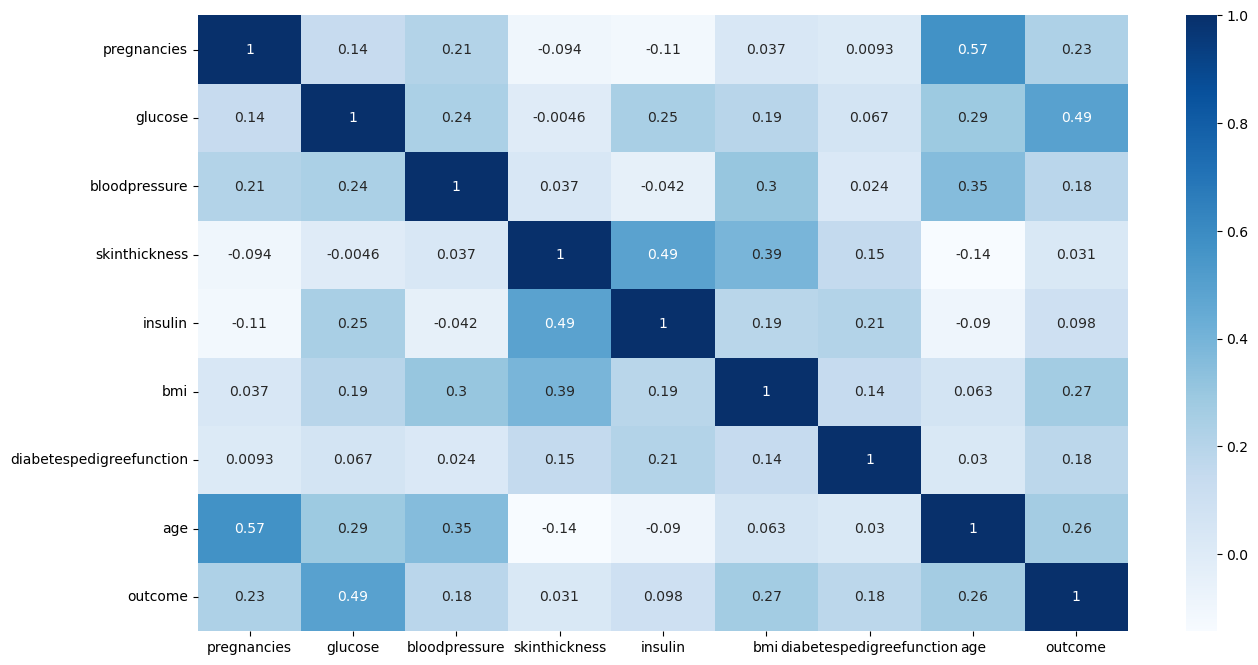

In [38]:
#we need to check the multicolinerity with features if it exist then the features with multicollinearity has to be removed before spliting the data for model building
plt.figure(figsize = (15,8))

sns.heatmap(data_trim.corr(), annot = True, cmap="Blues")


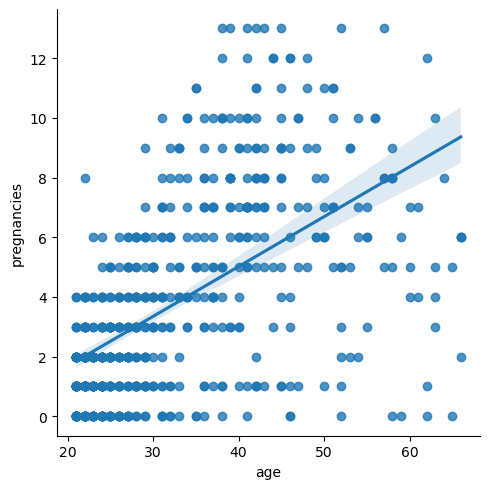

In [39]:
#since the heatmap shows age vs pregnancies and insulin vs skinthickness are having the collinearity of 57% and 49 % respectively,let explore them deeply

sns.lmplot(data = data_trim, x = 'age', y = 'pregnancies')
# scatterplot results shows that it has not much steep collinearity.

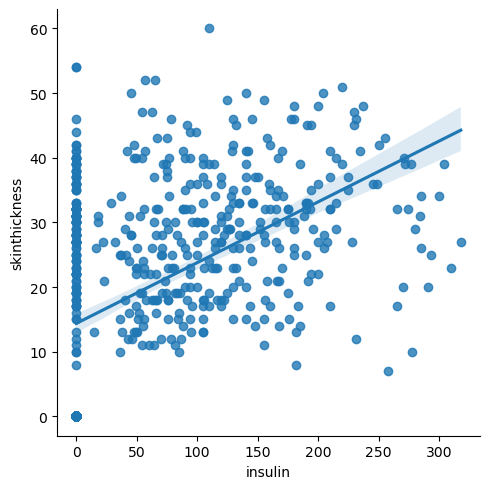

In [40]:
sns.lmplot(data = data_trim, x = 'insulin', y = 'skinthickness')

 **Scatterplot results shows that it has not much steep collinearity. in result we are not dropping the features**

we are splitting the Dataset in X as independent features(excluding target variable) , y is as dependent variable(target)

In [41]:
X = data_trim.drop(columns = 'outcome') # independent features(excluding target variable)
y = data_trim['outcome'] #dependent variable(target)

In [42]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [43]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: outcome, dtype: int64

In [79]:
#now we need to split the dataset in to training and testing data so that we can scale the Dataset to fit into the models.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

X_train.shape,X_test.shape,y_train.shape, y_test.shape

((479, 8), (160, 8), (479,), (160,))

In [80]:

# now we need to scale the dataset with standard scaler.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

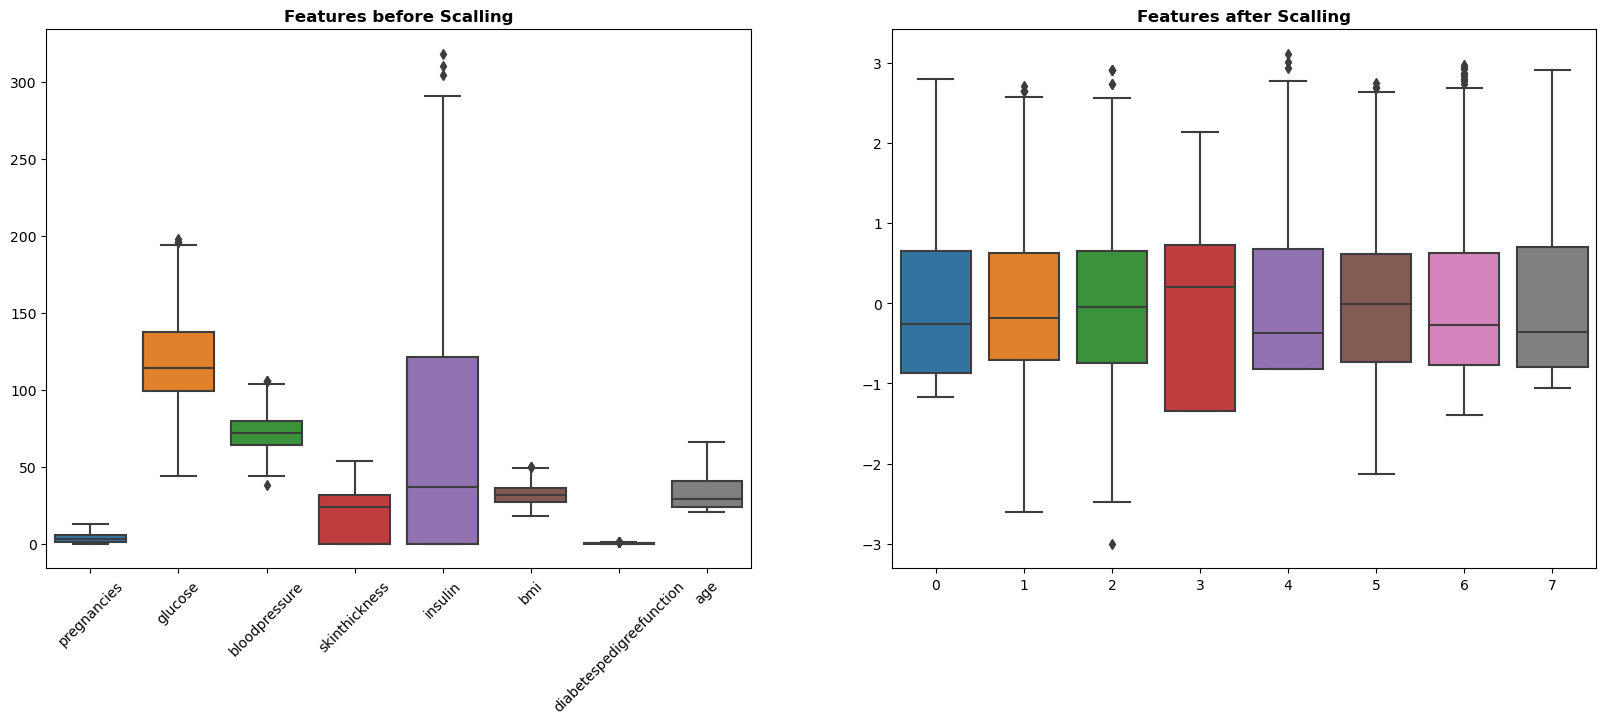

In [81]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.xticks(rotation=45)
plt.title('Features before Scalling', weight = 'bold')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('Features after Scalling', weight = 'bold')
plt.show()

above two graphs shows the comparision of after and before scalling the features of dataset. (in this case we have scalled the features with Standarad Scaler so that the values after scalling have come up between -3 to 3)

## Machine Learning Algorithms ##

In [82]:
# try different classification algorithms : LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8125
[[104   5]
 [ 25  26]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       109
           1       0.84      0.51      0.63        51

    accuracy                           0.81       160
   macro avg       0.82      0.73      0.75       160
weighted avg       0.82      0.81      0.80       160



In [83]:
# try different classification algorithms : DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled,y_train)
y_pred = dtree.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.70625
[[86 23]
 [24 27]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       109
           1       0.54      0.53      0.53        51

    accuracy                           0.71       160
   macro avg       0.66      0.66      0.66       160
weighted avg       0.70      0.71      0.71       160



In [84]:
# try different classification algorithms : RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfcl = RandomForestClassifier()
rfcl.fit(X_train_scaled,y_train)
y_pred = rfcl.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.79375
[[100   9]
 [ 24  27]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       109
           1       0.75      0.53      0.62        51

    accuracy                           0.79       160
   macro avg       0.78      0.72      0.74       160
weighted avg       0.79      0.79      0.78       160



In [85]:
# try different classification algorithms : Support Vector Classifier

from sklearn.svm import SVC
svc= SVC(kernel='linear')
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.80625
[[104   5]
 [ 26  25]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       109
           1       0.83      0.49      0.62        51

    accuracy                           0.81       160
   macro avg       0.82      0.72      0.74       160
weighted avg       0.81      0.81      0.79       160



Above all 4 Algorithms are giving a Accuracy near by 80 % but FP (False Positive) are very much which has to be minimum as we want our model to predict as good as TP. We can continue with our Hyperparameter tuning for the above Models and will see if we can get better result or not.

## Hyperparameter tuning on best performing model ##

In [86]:
# we take RandomForestClassifier and apply gridsearchCV for hyperparameter tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

rfcl = RandomForestClassifier()
rfcl.fit(X_train_scaled,y_train)
y_pred = rfcl.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7875
[[99 10]
 [24 27]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       109
           1       0.73      0.53      0.61        51

    accuracy                           0.79       160
   macro avg       0.77      0.72      0.73       160
weighted avg       0.78      0.79      0.78       160



In [87]:
# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [88]:
# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator= rfcl, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [92]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [93]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [94]:
# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test_scaled)

In [95]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.7875


In [96]:
print(confusion_matrix(y_test,y_pred_best))
print(classification_report(y_test, y_pred_best))

[[100   9]
 [ 25  26]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       109
           1       0.74      0.51      0.60        51

    accuracy                           0.79       160
   macro avg       0.77      0.71      0.73       160
weighted avg       0.78      0.79      0.77       160



**After Hyperparameter tuning we are not able to get good FP Score, by adjusting Decision threshold (threshold value > 0.35) in Random Forest helps us to get 77 % Recall Value for 1 (for Diabetic) it can be seen below**

In [97]:
y_prob = best_rf_model.predict_proba(X_test_scaled)[:,1]
y_pred_adjusted = (y_prob > 0.40).astype(int)
print(confusion_matrix(y_test,y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

[[93 16]
 [14 37]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       109
           1       0.70      0.73      0.71        51

    accuracy                           0.81       160
   macro avg       0.78      0.79      0.79       160
weighted avg       0.81      0.81      0.81       160



In [98]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# y_prob1 = best_rf_model.predict_proba(X_test_scaled)[:, 1]
# y_pred_adjusted_1 = (y_prob1 > 0.40).astype(int)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_adjusted)


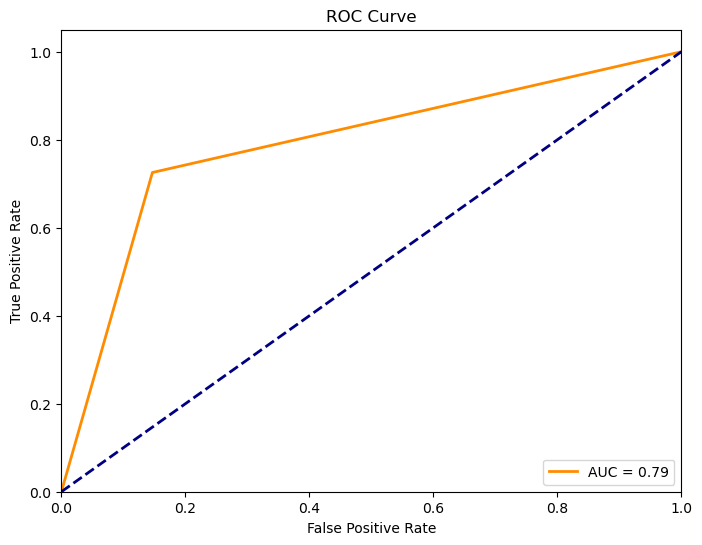

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Conclusion: ##

In our Task for Predicting the Diabetic Patients we have been provided dataset of 768 Patients with which we tried to predict whether the Person is diabetic or not with help of Machine Learning techniques and its algorithms by building a various models. after tuning the model and having tried with all threshold values it is able to give us an Accuracy of 81% with 73% of Recall for 1. Which means our model is 73 % accurate in predicting a person who is diabetic in real.

We can try some other Algorithm for adjusting the Threshold to get best Accuracy for all Parameters of Matrix.

Drawbacks :
1. limited Dataset (More the Data - good model performance),
2. imbalanced data for the model might lose the information or can be biased at predicting (Balancing the data can be good approch)

Takeaways :
If false positives (FP) are more critical (e.g., misclassifying a non-diabetic person as diabetic is costly), you might prioritize precision.

If false negatives (FN) are more critical (e.g., failing to identify a diabetic patient), you might prioritize recall.

Accuracy is generally important but may not be sufficient on its own, especially in imbalanced datasets where one class is much more prevalent than the other.